In [1]:
# See the value of multiple statements at once
#output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd          
import numpy as np         
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [4]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.shape

(144, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


#### Converting data in .csv file into time-series data
- The read_csv() function of pandas has few more attributes, which will help us to convert the data into time-series data for further analysis.
    - parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
    - index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.
    - date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.


In [7]:
### converting into time series data


In [8]:
dateparse=lambda dates:pd.datetime.strptime(dates,'%Y-%m')
parse_data=pd.read_csv('AirPassengers.csv',parse_dates=['Month'],
                      index_col='Month',date_parser=dateparse)

In [9]:
parse_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
parse_data.shape

(144, 1)

In [11]:
## now data has time object has index and #passengers as the column

parse_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
## since only one column is there #passengers..we conver into pandas series

ts=parse_data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
## ways of extracting data from time series data

In [14]:
# extract the data using series
ts['1949-01-01']

112

In [15]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [16]:
# extract range of data:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [17]:
ts[:'1949-06-01']  ## last value is included unlike numeric indexing

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
Name: #Passengers, dtype: int64

In [18]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

### TS Data Visualization

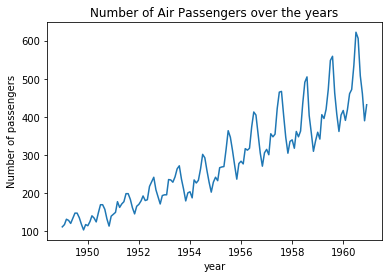

In [19]:
# plot the data and observe the trend

plt.plot(ts)
plt.title('Number of Air Passengers over the years')
plt.xlabel('year')
plt.ylabel('Number of passengers')
plt.show();

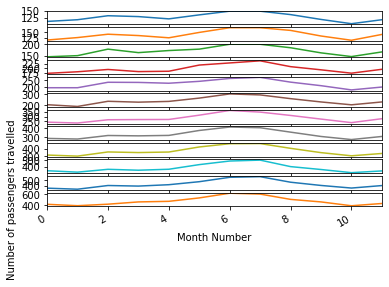

<Figure size 1080x720 with 0 Axes>

In [20]:
from pandas import Grouper

groups=ts.groupby(Grouper(freq='A'))
years=pd.DataFrame()
for name,group in groups:
    years[name.year]=group.values
years.plot(subplots=True,legend=False)
plt.xlabel('Month Number')
plt.ylabel('Number of passengers travelled')
plt.figure(figsize=(15,10))
plt.show();

### Plotting year-wise data
It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.

The AirPassenger dataset spans 12 years. We can group data by year and create a line plot for each year for direct comparison.

The example below shows how to do this.

The groups are then enumerated and the observations for each year are stored as columns in a new DataFrame.

Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.


### Time series Boxplot

##### this plot draws a box plot around the 25th and 75th percentile of the data that captures the middle
##### 50% of the observations

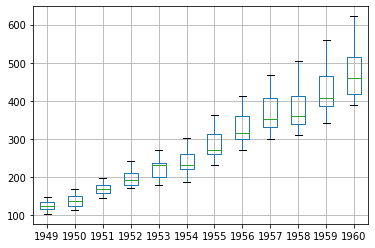

In [21]:
years.boxplot()

#### Time series Histogram Plot

#### Another important visualization is of the distribution of the observations themselves
##### This means a plot of the values without the temporal ordering
##### this will help us to check the distribution of observations
#####  and,gives an idea about type of data transform to be performed

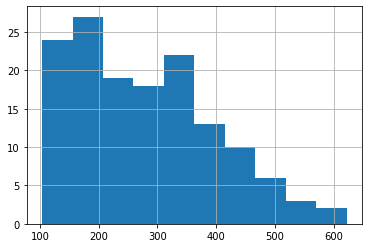

In [22]:
ts.hist()
plt.show()

###  Decomposing:
- Time series decomposition is a mathematical procedure which transforms a time series into multiple different time series. The original time series is often split into 3 component series:
    - Seasonal: Patterns that repeat with a fixed period of time. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
    - Trend: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
    - Random: Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.

- For more details, read: https://anomaly.io/seasonal-trend-decomposition-in-r/ and https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

- Here,  both trend and seasonality are modeled separately and the remaining part of the series is returned.


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts)
trend=decomposition.trend
seasoanl=decomposition.seasonal
residual=decomposition.resid

In [24]:
'''
The subplot() takes argument as either a 3 digit integer or three separate integers describing the 
position of the subplot.If the three integers are nrows,ncols, and index in order the subplot will take
the index position on a grid with nrows and ncols columns.index starts at 1 in the upper left corner
and increases to the right'''

'\nThe subplot() takes argument as either a 3 digit integer or three separate integers describing the \nposition of the subplot.If the three integers are nrows,ncols, and index in order the subplot will take\nthe index position on a grid with nrows and ncols columns.index starts at 1 in the upper left corner\nand increases to the right'

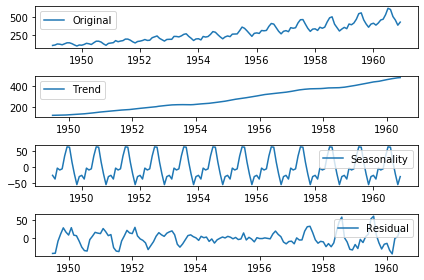

In [25]:
plt.subplot(4,1,1,)
plt.plot(ts,label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasoanl,label='Seasonality')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show();


## ARIMA

### step1: checking the data for stationarity

##### one way is looking at the graph,check whether the data looks like a white noise
##### second one is performing test called,Augmented dickey fuller test 

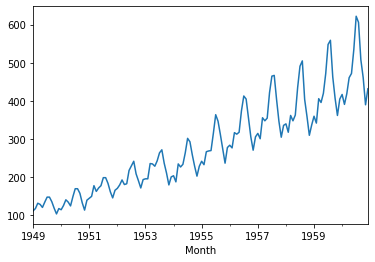

In [26]:
ts.plot()
plt.show()

#### Applying augumented dickey fuller test

#### null hypothesis: time series data is stationary
#### alternate hypothesis: the time series data is non stationary
##### if the test statistic value is lesser than the critical value(at 1% or 5% or 10% confidence interval),then we can say that the null hypothesis is accpeted at a particular confidenece interval
##### if the test statistic is greater we have to reject the null hypothesis

##### this test also computes moving average internally

In [27]:
from statsmodels.tsa.stattools import adfuller  ## augumented duckey fuller test

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC') ## here it takes lag automatically,we need not to specify
    ## it took lag for every 13 months
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [28]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### step2: making the data stationary

##### one of the tricks to reduce trend can be transformation,for example in the current example,we can clearly see that the there is a significant positive trend,so we can apply log transformation which penalize higher values more than the smaller values
##### then we can go for differentiating the time series data

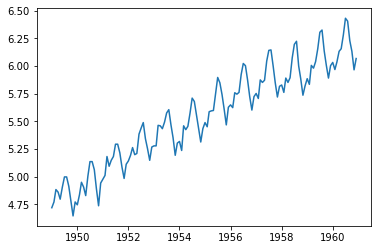

In [29]:
ts_log=np.log(ts)
plt.plot(ts_log)

In [30]:
ts_log_diff=ts_log.diff(periods=1)  ## differencing makes data stationa
ts_log_diff.head(8)  ### differencing means subracting previous value from the next value
                     ### we can do diff for different period values

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
Name: #Passengers, dtype: float64

In [31]:
ts_log_diff.dropna(inplace=True)

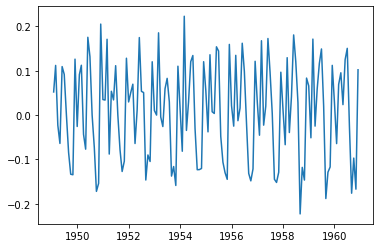

In [32]:
plt.plot(ts_log_diff)

In [33]:
test_stationarity(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


##### from the above output,we can say that data became stationary at 10% level of significance(or 90% confidence)

#### and the order of differencing in d in  ARIMA model is found to be 1


#### plot PACF and ACF

### ACF

- It is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.
- In simple terms, it describes how well the present value of the series is related with its past values. 
- A time series can have components like trend, seasonality, cyclic and residual. 
- ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.


***PACF***
- PACF is a partial auto-correlation function. 
- Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. 
- So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next 


In [34]:
from statsmodels.tsa.stattools import acf, pacf


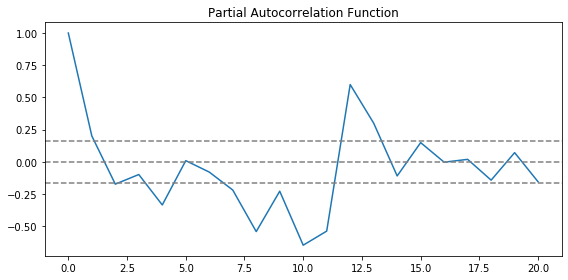

In [35]:
#Plot PACF:
#plt.subplot(122)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.figure(figsize=(8,4))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show();


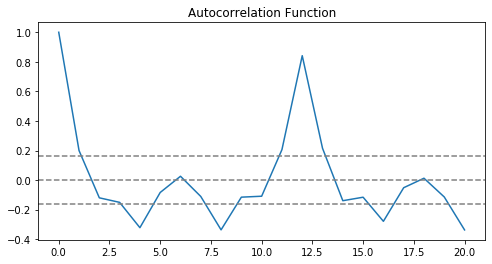

In [36]:
#plt.subplot(121) 
lag_acf = acf(ts_log_diff, nlags=20)
plt.figure(figsize=(8,4))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show();


In [37]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


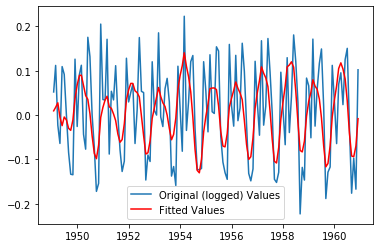

In [38]:
model=ARIMA(ts_log,order=(2,1,2))
results_ARIMA=model.fit()
plt.plot(ts_log_diff,label='Original (logged) Values')
plt.plot(results_ARIMA.fittedvalues,color='red',label='Fitted Values')
plt.legend()
plt.show();

#### step4: Bringing back the data to normal scale (from log-scale) 

initially,we took log of the TS data and then applied stationarity.ARIMA etc..Now we have to re-scale it

In [39]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [40]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [41]:
predictions_ARIMA_log=pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [42]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073415
1949-04-01    118.301987
1949-05-01    117.768364
dtype: float64

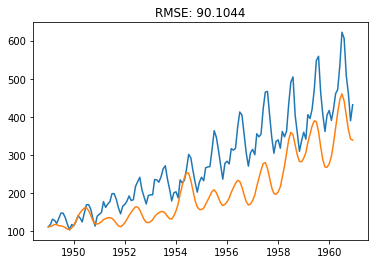

In [43]:
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show();


#### step5: forecast for future time period



In [44]:
# forecast for 36 months
# note that,we have to use the object on ARIMA prediciton was done

forecast=results_ARIMA.forecast(steps=36)[0]

In [45]:
forecast

array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
       6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
       6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
       6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
       6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
       6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
       6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
       6.53322372])

In [46]:
#converting log values into actuals

forecast_actual=np.exp(forecast)




In [47]:
date_index=pd.date_range(start='1/1961',end='12/1963',
                        freq=pd.offsets.MonthBegin())
date_index

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [48]:
forecast_actual=pd.Series(forecast_actual,index=date_index)
forecast_actual.head()

1961-01-01    443.870996
1961-02-01    470.038269
1961-03-01    504.935028
1961-04-01    540.454859
1961-05-01    567.730735
Freq: MS, dtype: float64

In [49]:
updated_data=ts.append(forecast_actual)

In [50]:
updated_data.tail()

1963-08-01    679.341495
1963-09-01    677.659769
1963-10-01    677.586343
1963-11-01    680.698402
1963-12-01    687.611309
dtype: float64

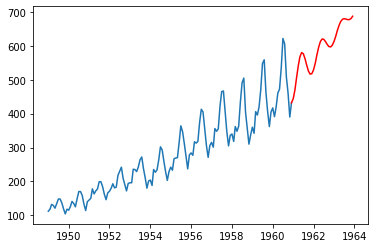

In [51]:
plt.plot(updated_data[:'1960'])
plt.plot(updated_data['1960-12-01':],color='red')